In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/Heart disease and diet.csv')

In [ ]:
data.head(5)

,Country,Diet_type,Workout_routine,Suffered_with_covid,Age,Cardiac_arrest,Survived
0,India,High fiber,Yes,Yes,34,No,Yes
1,India,High fiber,Yes,Yes,22,Yes,Yes
2,India,Fatty,Yes,Yes,25,Yes,Yes
3,India,Fatty,No,Yes,32,Yes,No
4,USA,Bakery,Yes,Yes,21,Yes,No


In [ ]:
data.columns

Index(['Country', 'Diet_type', 'Workout_routine', 'Suffered_with_covid', 'Age',
       'Cardiac_arrest', 'Survived'],
      dtype='object')

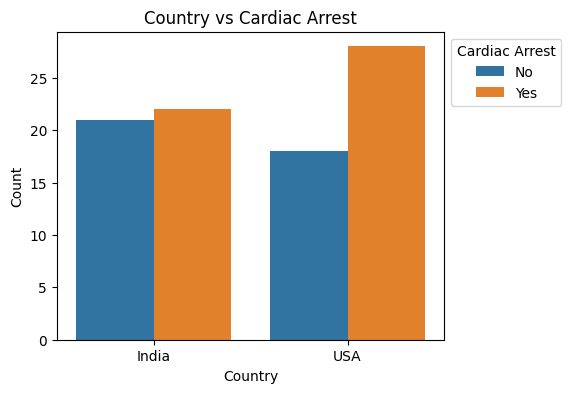

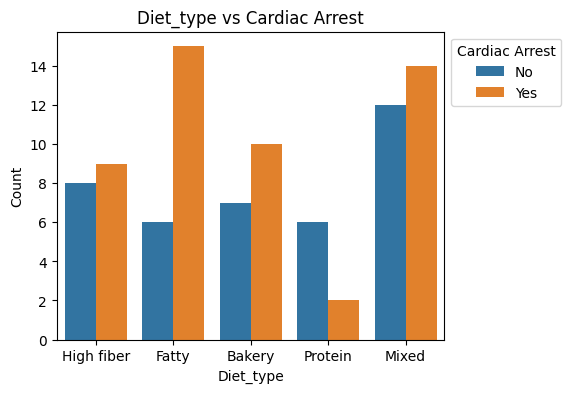

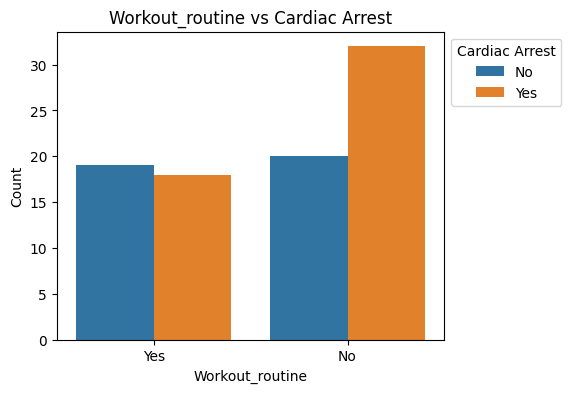

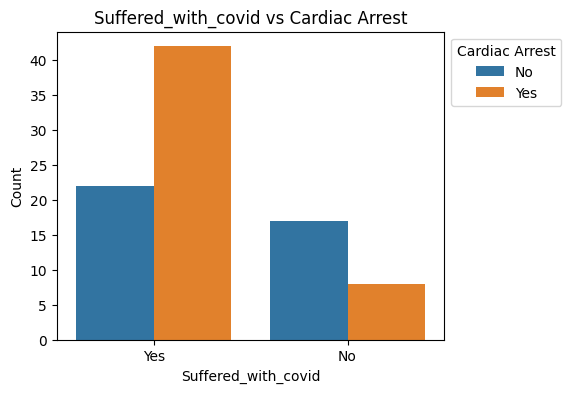

In [ ]:
categorical_features = ['Country', 'Diet_type', 'Workout_routine', 'Suffered_with_covid']

for feature in categorical_features:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=feature, hue='Cardiac_arrest', data=data)
    plt.title(f'{feature} vs Cardiac Arrest')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Cardiac Arrest', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

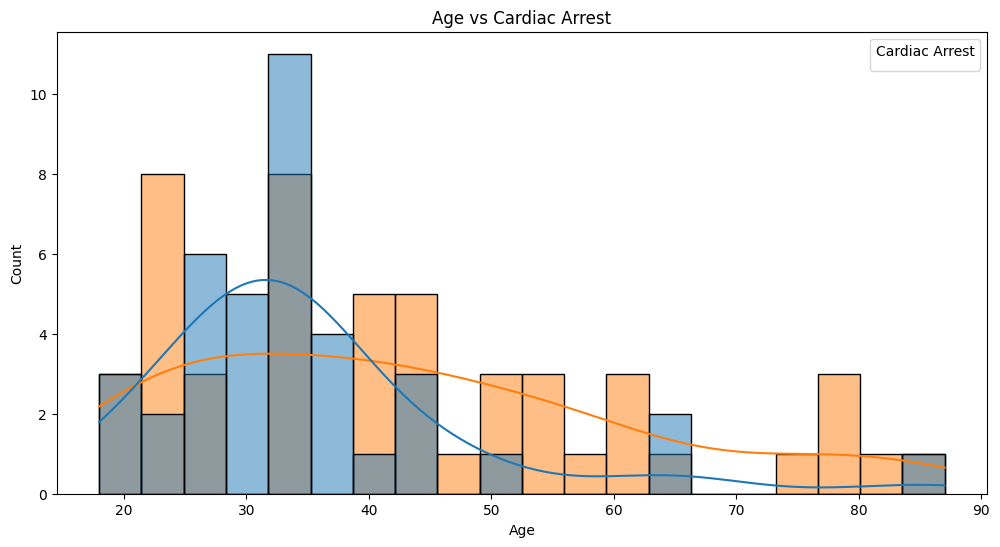

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Cardiac_arrest', data=data, bins=20, kde=True)
plt.title('Age vs Cardiac Arrest')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Cardiac Arrest', loc='upper right')
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Country'].unique

<bound method Series.unique of 0     0
1     0
2     0
3     0
4     1
     ..
84    0
85    0
86    1
87    1
88    1
Name: Country, Length: 89, dtype: int64>

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Diet_type'] = label_encoder.fit_transform(data['Diet_type'])
data['Diet_type'].unique

<bound method Series.unique of 0     2
1     2
2     1
3     1
4     0
     ..
84    0
85    0
86    0
87    0
88    0
Name: Diet_type, Length: 89, dtype: int64>

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Workout_routine'] = label_encoder.fit_transform(data['Workout_routine'])
data['Workout_routine'].unique

<bound method Series.unique of 0     1
1     1
2     1
3     0
4     1
     ..
84    0
85    1
86    1
87    1
88    1
Name: Workout_routine, Length: 89, dtype: int64>

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Suffered_with_covid'] = label_encoder.fit_transform(data['Suffered_with_covid'])
data['Suffered_with_covid'].unique

<bound method Series.unique of 0     1
1     1
2     1
3     1
4     1
     ..
84    1
85    1
86    1
87    1
88    1
Name: Suffered_with_covid, Length: 89, dtype: int64>

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Cardiac_arrest'] = label_encoder.fit_transform(data['Cardiac_arrest'])
data['Cardiac_arrest'].unique

<bound method Series.unique of 0     0
1     1
2     1
3     1
4     1
     ..
84    0
85    1
86    1
87    1
88    0
Name: Cardiac_arrest, Length: 89, dtype: int64>

                      Country  Diet_type  Workout_routine  \
Country              1.000000  -0.016716        -0.129431   
Diet_type           -0.016716   1.000000        -0.028488   
Workout_routine     -0.129431  -0.028488         1.000000   
Suffered_with_covid -0.024825  -0.247713         0.070674   
Age                  0.093363   0.339881        -0.106933   
Cardiac_arrest       0.044973  -0.171974        -0.128036   

                     Suffered_with_covid       Age  Cardiac_arrest  
Country                        -0.024825  0.093363        0.044973  
Diet_type                      -0.247713  0.339881       -0.171974  
Workout_routine                 0.070674 -0.106933       -0.128036  
Suffered_with_covid             1.000000 -0.225742        0.304583  
Age                            -0.225742  1.000000        0.235745  
Cardiac_arrest                  0.304583  0.235745        1.000000  


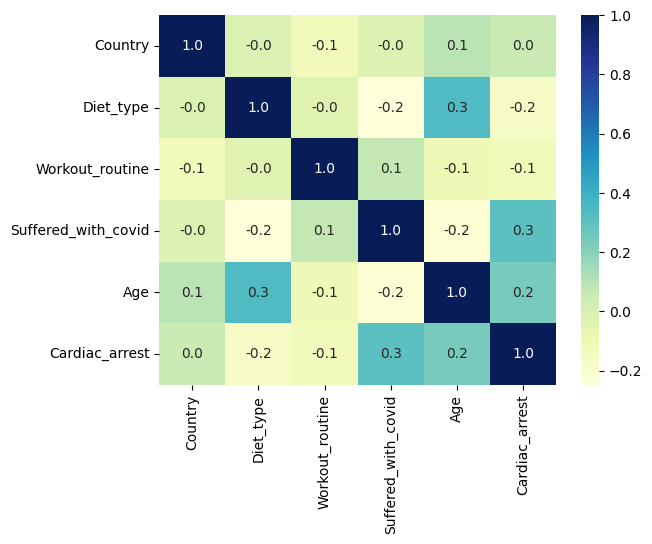

In [ ]:
#Checking correlation of features with the target variable using heatmap
print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, fmt=".1f")
plt.show()

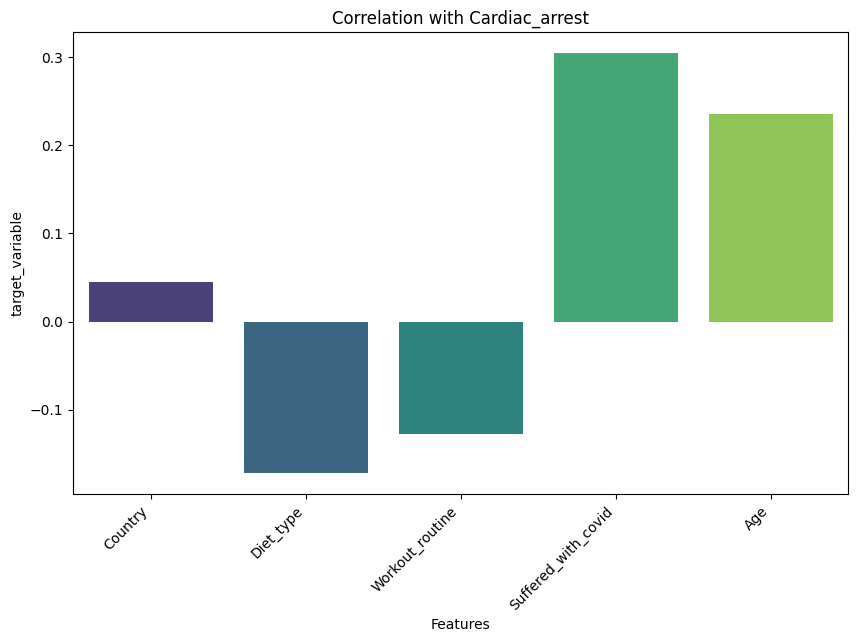

In [ ]:
target_variable = 'Cardiac_arrest'
feature_variable = ['Country', 'Diet_type', 'Workout_routine', 'Suffered_with_covid', 'Age',
       ]

correlation_matrix = data.corr()
target_correlations = correlation_matrix[target_variable].drop(target_variable)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.index, y=target_correlations.values, palette="viridis")
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Features')
plt.ylabel('target_variable')
plt.xticks(rotation=45, ha='right')
plt.show()